In [5]:
import matplotlib.pyplot as plt

In [62]:
import cv2

In [116]:
im = cv2.imread('ele.jpg')        #reads an image into BGR format
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(original_shape)

(667, 455, 3)


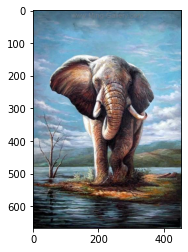

In [117]:
plt.imshow(im)                #reads as RGB format

In [118]:
#Flatten each channel of the Img
all_pixels = im.reshape((-1, 3))
print(all_pixels.shape)

(303485, 3)


In [119]:
from sklearn.cluster import KMeans

In [120]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [121]:
centers = km.cluster_centers_         # give RGB values of the colors which kmeans found

In [122]:
import numpy as np
centers = np.array(centers, dtype='uint8')                  # Convrt centers into 8 bits numbers

In [123]:
print(centers)               #RGB value for 1,2nd, 3rd and 4th color

[[198 208 218]
 [106 107 107]
 [127 168 192]
 [ 46  38  39]]


# plot what all colors are these

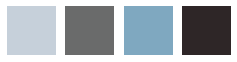

In [124]:
i = 1
plt.figure(0, figsize=(4, 2))
colors = []
for each_col in centers:
  plt.subplot(1, 4, i)
  plt.axis('off')
  i += 1
  colors.append(each_col)
  #color swatch
  a = np.zeros((100, 100, 3), dtype = 'uint8')
  a[:,:,:] = each_col

  plt.imshow(a)
plt.show()

**Segmenting our original Image**

In [129]:
new_img = np.zeros((667*455,3),dtype = 'uint8')
print(new_img.shape)

(303485, 3)


In [130]:
colors

[array([198, 208, 218], dtype=uint8),
 array([106, 107, 107], dtype=uint8),
 array([127, 168, 192], dtype=uint8),
 array([46, 38, 39], dtype=uint8)]

In [131]:
km.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

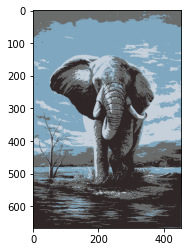

In [132]:
for ix in range(new_img.shape[0]):
  new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape(original_shape)
plt.imshow(new_img)
plt.show()